In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
columns=['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
         'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring'
         ,'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

# loading data

In [33]:
mushroom_data=pd.read_csv('mushroom.csv',names=columns,header=None)
mushroom_data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

# Analysing data

Making a copy of original dataset

In [34]:
mushroom_copy=mushroom_data.copy()
mushroom_copy.shape

(8124, 23)

In [35]:
mushroom_copy.tail()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[5 rows x 23 columns]

checking for null values

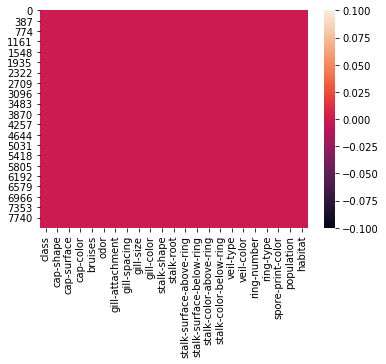

In [36]:
import seaborn as sb
sb.heatmap(mushroom_copy.isna())

In [37]:
mushroom_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [38]:
mushroom_copy.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

# Data preprocessing

In [39]:
import sklearn
from sklearn.preprocessing import LabelEncoder
for i in columns:
    mushroom_copy[i]=LabelEncoder().fit_transform(mushroom_copy[i])

In [40]:
mushroom_copy.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [42]:
mushroom_copy.describe()

class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       2.000000         1.000000      0.000000     0.000000     2.000000   
50%       5.000000         1.000000      0.000000     0.000000     5.000000   
75%       5.000000         1.000000      0.000000     1.000000     7.000000   
max       8.000000         1.000000      1.000000     1.000000    11.000000   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               8124.000000             8124.000000   
mean   ...                  1.603644                5.816347   
std    ...                  0.675974                1.901747   
min    ...                  0.000000                0.000000   
25%    ...                  1.000000                6.000000   
50%    ...                  2.000000                7.000000   
75%    ...                  2.000000                7.000000   
max    ...                  3.000000                8.000000   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             8124.000000     8124.0  8124.000000  8124.000000   
mean                 5.794682        0.0     1.965534     1.069424   
std                  1.907291        0.0     0.242669     0.271064   
min                  0.000000        0.0     0.000000     0.000000   
25%                  6.000000        0.0     2.000000     1.000000   
50%                  7.000000        0.0     2.000000     1.000000   
75%                  7.000000        0.0     2.000000     1.000000   
max                  8.000000        0.0     3.000000     2.000000   

         ring-type  spore-print-color   population      habitat  
count  8124.000000        8124.000000  8124.000000  8124.000000  
mean      2.291974           3.596750     3.644018     1.508616  
std       1.801672           2.382663     1.252082     1.719975  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.000000           2.000000     3.000000     0.000000  
50%       2.000000           3.000000     4.000000     1.000000  
75%       4.000000           7.000000     4.000000     2.000000  
max       4.000000           8.000000     5.000000     6.000000  

[8 rows x 23 columns]

# importing libraries to prepare model and to train it

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

preparing a function to find best random state for accuracy

In [53]:
def classification(dataset,test_size,model):
    max=0
    ind=0
    x=dataset.iloc[:,1:]
    y=dataset[['class']]
    for i in range(100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < accuracy_score(test_y,pred)):
                max=accuracy_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('score :',model.score(train_x,train_y))
    print('Accuracy score :\n',accuracy_score(test_y,pred))
    print('Best accuracy at Random state :',ind)
    print('\nConfusion Matrix :\n',confusion_matrix(test_y,pred))
    print('\nclassification_report :\n',classification_report(test_y,pred))

Finding the best model which is giving highest accuracy among all

In [56]:
model_list=[LogisticRegression(),DecisionTreeClassifier(criterion='gini'),DecisionTreeClassifier(criterion='entropy'),
            SVC(kernel='rbf'),SVC(kernel='poly'),KNeighborsClassifier(),MultinomialNB(),SVC(kernel='linear')]
for i in model_list:
    print('\nResult for model :',i)
    classification(mushroom_copy,0.30,i)


Result for model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score : 0.9523390784382695
Accuracy score :
 0.9585726004922067
Best accuracy at Random state : 21

Confusion Matrix :
 [[1217   51]
 [  50 1120]]

classification_report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1268
           1       0.96      0.96      0.96      1170

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438


Result for model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, m

We can see that best accuracy is given by DecisionTreeClassifier at random state 0.Hence finalizing it

In [57]:
x=mushroom_copy.iloc[:,1:]
y=mushroom_copy[['class']]
model=DecisionTreeClassifier(criterion='gini')
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=11)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('score :',model.score(train_x,train_y))
print('Accuracy score :\n',accuracy_score(test_y,pred))
print('\nConfusion Matrix :\n',confusion_matrix(test_y,pred))
print('\nclassification_report :\n',classification_report(test_y,pred))

score : 1.0
Accuracy score :
 1.0

Confusion Matrix :
 [[1069    0]
 [   0  962]]

classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# checking underfitting / overfitting

In [58]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(),x,y,cv=5,scoring='accuracy')
print('cross validation score is :',scores,scores.mean())

cross validation score is : [0.63015385 0.98276923 0.87569231 0.99815385 0.71366995] 0.8400878363016295


cross validation score is not too far from accuracy score hence we can consider the model

# Serialization

In [60]:
from sklearn.externals import joblib
joblib.dump(model,'mushroom_model')

['mushroom_model']